
This notebook is an implementation of object detection using animal kingdom dataset.

Involves:
- fine tuning yolo v8 model

some useful tools
- https://www.makesense.ai/
- roboflow for data formatting.
- ultralytics for accessing yolo model

data
- 9987 0f 33k animal kingdom images are uploaded to roboflow for data formatting.

resources
- a note on bounding box measurements -> https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/#yolo



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir("/content")
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!nvidia-smi


Thu Mar 21 08:38:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

### Lets start off with an example of using yolo for object detection on example image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content/drive/MyDrive/yolov8
WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.
100% 6.23M/6.23M [00:00<00:00, 108MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 106MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 90.0ms
Speed: 14.0ms preprocess, 90.0ms inference, 745.0ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content/drive/MyDrive/yolov8


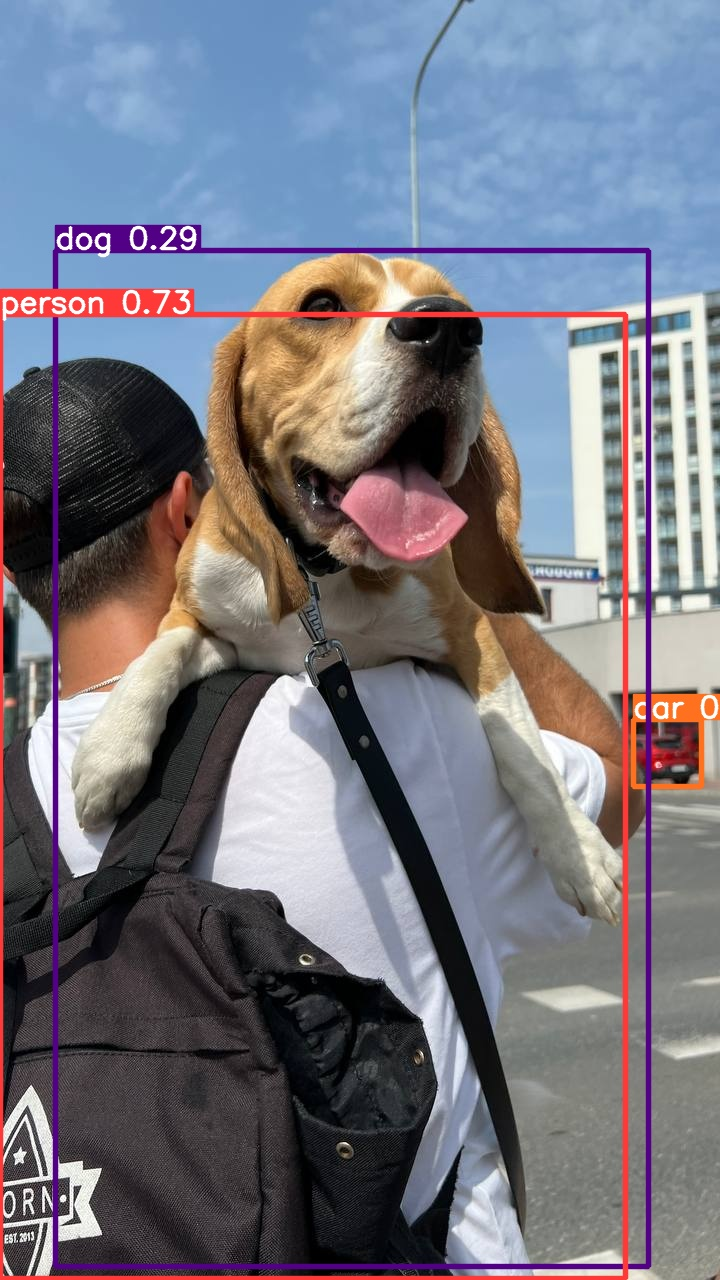

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### Now that we have seen an example, can we try using the animal kingdom dataset?

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mDFXDWEOGMxwoXi8Vj1V")
project = rf.workspace("antony-mhs7t").project("detect-animal-cij7h")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninst

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to detect-animal-2 in yolov8:: 100%|██████████| 20014/20014 [00:03<00:00, 5055.83it/s]


running yolov8 on the model.

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data="/content/datasets/detect-animal-2/data.yaml" epochs=10  plots=True

New https://pypi.org/project/ultralytics/8.1.30 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/detect-animal-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, a

In [ ]:
# prompt: a code to download the dataset and the runs

!zip -r runs.zip runs
!zip -r dataset.zip /content/datasets/detect-animal-2
from google.colab import files
files.download("/content/datasets/runs.zip")
files.download("/content/datasets/dataset.zip")


Streaming output truncated to the last 5000 lines.
updating: content/datasets/detect-animal-2/test/images/NVQRGSOM_f000132_jpg.rf.35a4814c88384956bf2b809e178b6864.jpg (deflated 45%)
updating: content/datasets/detect-animal-2/test/images/DQZODUPH_f000033_jpg.rf.a4d8426d98ef1606d074c36b9c374944.jpg (deflated 0%)
updating: content/datasets/detect-animal-2/test/images/DMCRULHH_f000025_jpg.rf.4445acd3bd8a4b025a354945fe08732e.jpg (deflated 2%)
updating: content/datasets/detect-animal-2/test/images/APZCCFFP_f000029_jpg.rf.f633119639016595075ea329483e52bf.jpg (deflated 0%)
updating: content/datasets/detect-animal-2/test/images/MUYQQVCV_f000014_jpg.rf.7e14686840309777861228402d4720e7.jpg (deflated 1%)
updating: content/datasets/detect-animal-2/test/images/ALVMKWWH_f000171_jpg.rf.e53bd745fce807abcf821cb9becf632c.jpg (deflated 0%)
updating: content/datasets/detect-animal-2/test/images/HPWXEOXJ_f000010_jpg.rf.91a0699469d595ac303b8a1dd6d64830.jpg (deflated 0%)
updating: content/datasets/detect-anim

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>